<h2><center> Исследование данных авиакомпании </center></h2>

## Оглавление
* [Описание проекта](#first-bullet)
* [Описание данных](#second-bullet)
* [Пояснение](#third-bullet)
* [Шаг 1. Парсинг данных](#fourth-bullet)
* [Шаг 2. Исследовательский анализ данных (с помощью SQL)](#fifth-bullet)
* [Шаг 3. Аналитика средствами Python](#sixth-bullet)

## Описание проекта <a class="anchor" id="first-bullet"></a>

«F9» — российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.
Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

#### Последовательность действий:

#### Шаг 1. 

Написать парсер для сбора с сайта данных о 10 крупнейших фестивалях 2018 года

Ссылка на сайт: https://code.s3.yandex.net/learning-materials/data-analyst/festival_news/index.html

#### Шаг 2. Исследовательский анализ данных (SQL)

Найти количество рейсов с вылетом в сентябре 2018 года на каждой модели самолёта. Назвать получившееся поле flights_amount и вывести его, также вывести поле model.
Посчитать количество рейсов по всем моделям самолетов Boeing и Airbus в сентябре. Назвать получившуюся переменную flights_amount и вывести ее.
Посчитать среднее количество прибывающих рейсов в день для каждого города за август 2018 года. Назвать получившееся поле average_flights , вместе с ней вывести столбец city.

Установить фестивали, которые проходили с 23 июля по 30 сентября 2018 года в Москве, и номер недели, в которую они проходили. Вывести название фестиваля festival_name и номер недели festival_week.
Для каждой недели с 23 июля по 30 сентября 2018 года посчитать количество билетов, купленных на рейсы в Москву (номер недели week_number и количество рейсов flights_amount). Получить таблицу, в которой будет информация о количестве купленных за неделю билетов, отметка, проходил ли в эту неделю фестиваль, название фестиваля festival_name и номер недели week_number.

#### Шаг 3. Аналитика средствами Python

Файлы, содержащие результаты запросов из предыдущих шагов:

Колонки в *query_1.csv*:

- `model` — модели самолета
- `flights_amount` — количество рейсов для каждой модели самолетов model в сентябре 2018 года

Колонки в *query_3.csv*:
- `city` — городах
- `average_flights` — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

Для этих двух наборов данных нужно:
- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

## Описание данных <a class="anchor" id="second-bullet"></a>

#### Таблица airports — информация об аэропортах:
- `airport_code` — трёхбуквенный код аэропорта
- `airport_name` — название аэропорта
- `city` — город
- `timezone` — временная зона

#### Таблица aircrafts — информация о самолётах:
- `aircraft_code` — код модели самолёта
- `model` — модель самолёта
- `range` — количество самолётов

#### Таблица tickets — информация о билетах:
- `ticket_no` — уникальный номер билета
- `passenger_id` — персональный идентификатор пассажира
- `passenger_name` — имя и фамилия пассажира

#### Таблица flights — информация о рейсах:
- `flight_id` — уникальный идентификатор рейса
- `departure_airport` — аэропорт вылета
- `departure_time` — дата и время вылета
- `arrival_airport` — аэропорт прилёта
- `arrival_time` — дата и время прилёта
- `aircraft_code` – id самолёта

#### Таблица ticket_flights — стыковая таблица «рейсы-билеты»
- `ticket_no` — номер билета
- `flight_id` — идентификатор рейса

#### Таблица festivals — информация о фестивалях
- `festival_id` — уникальный номер фестиваля
- `festival_date` — дата проведения фестиваля
- `festival_city` — город проведения фестиваля
- `festival_name` — название фестиваля

## Пояснение <a class="anchor" id="third-bullet"></a>

Шаг 1 - написание парсера.

Шаг 2 - SQL запросы к базе данных.

Шаг 3 - использование результатов запросов для анализа.

## Шаг 1. Парсинг данных <a class="anchor" id="fourth-bullet"></a>

Напишем парсер для сбора с сайта данных о 11 крупнейших фестивалях 2018 года. Сохраним данные в датафрейм festivals.

In [2]:
# import pandas as pd
# import requests
# from bs4 import BeautifulSoup

# URL='https://code.s3.yandex.net/learning-materials/data-analyst/festival_news/index.html'
# req = requests.get(URL)
# soup = BeautifulSoup(req.text, 'lxml')

# festival_name=[]
# for row in soup.find_all('tr'):
#     if not row.find_all('th'):
#         festival_name.append([element.text for element in row.find_all('td')])
# festivals = pd.DataFrame(festival_name, columns=['Название фестиваля', 'Место проведения', 'Дата проведения'])
# print(festivals)

## Шаг 2. Исследовательский анализ данных (с помощью SQL) <a class="anchor" id="fifth-bullet"></a>

#### Схема таблиц

<img src="database.jpg">

#### 2.1 Изучим таблицу airports и выведим список городов (city), в которых есть аэропорты.

In [3]:
# SELECT DISTINCT airports.city
# FROM airports

#### 2.2 Изучим таблицу flights и подсчитаем количество вылетов (flight_id) из каждого аэропорта вылета (departure_airport). Назовем эту переменную cnt_flights и выведим её вместе со столбцом departure_airport — сначала departure_airport, потом cnt_flights. Результат отсортируем в порядке убывания количества вылетов.

In [4]:
# SELECT
#     flights.departure_airport AS departure_airport,
#     COUNT(flights.flight_id) AS cnt_flights
# FROM
#     flights
# GROUP BY
#     departure_airport
# ORDER BY 
#     COUNT(flights.flight_id) DESC

#### 2.3 Найдем количество рейсов на каждой модели самолёта с вылетом в сентябре 2018 года. Назовем получившийся столбец flights_amount и выведем его, также столбец model.

In [5]:
# SELECT
#      aircrafts.model AS model,
#      COUNT(flights.flight_id) AS flights_amount
# FROM 
#     flights
# JOIN aircrafts ON aircrafts.aircraft_code = flights.aircraft_code
# WHERE
#     CAST(departure_time as date) between '2018-09-01' and '2018-09-30'
# GROUP BY
#     aircrafts.model

#### 2.4 Посчитаем количество рейсов по всем моделям самолётов Boeing, Airbus и другим ('other') в сентябре. Типы моделей поместим в столбец type_aircraft, а количество рейсов — во flights_amount.

In [6]:
# SELECT
#      COUNT(flights.flight_id) AS flights_amount
# FROM 
#     flights
# JOIN aircrafts ON aircrafts.aircraft_code = flights.aircraft_code
# WHERE
#     (aircrafts.model LIKE 'Boeing%' OR aircrafts.model LIKE 'Airbus%') AND CAST(departure_time as date) between '2018-09-01' and '2018-09-30'

#### 2.5 Посчитаем среднее количество прибывающих рейсов в день для каждого города за август 2018 года. Назовем получившееся поле average_flights, вместе с ним выведем столбец city.

In [7]:
# SELECT
#     SUBQ.city,
#     AVG(SUBQ.cnt_flight) AS average_flights
# FROM
# (SELECT
#     airports.city,
#     COUNT(flights.flight_id) AS cnt_flight,
#     EXTRACT(day FROM flights.arrival_time) AS day_number
# FROM
#     flights
# JOIN airports ON airports.airport_code=flights.arrival_airport
# WHERE
#     CAST(flights.arrival_time AS date) BETWEEN '2018-08-01' AND '2018-08-31'
# GROUP BY
#     airports.city,
#     day_number) AS SUBQ
# GROUP BY
#     SUBQ.city;

#### 2.6 Установим какие фестивали проходили с 23 июля по 30 сентября 2018 года в Москве, и номер недели, в которую они проходили.

In [8]:
# SELECT
#     festivals.festival_name,
#     EXTRACT(week FROM festivals.festival_date) AS festival_week
# FROM
#     festivals
# WHERE
#     CAST(festival_date as date) BETWEEN '2018-07-23' AND '2018-09-30' AND festivals.festival_city = 'Москва'

#### 2.7 Для каждой недели с 23 июля по 30 сентября 2018 года посчитаем количество билетов, купленных на рейсы в Москву (номер недели week_number и количество билетов ticket_amount). Получим таблицу, в которой будет информация о количестве купленных за неделю билетов; отметка, проходил ли в эту неделю фестиваль; название фестиваля festival_name и номер недели week_number.

In [9]:
# SELECT
#     EXTRACT(week FROM arrival_time)  AS week_number,
#     COUNT(ticket_flights.ticket_no) AS ticket_amount,
#     subq.festival_week,
#     subq.festival_name
# FROM
#     flights
# JOIN ticket_flights ON ticket_flights.flight_id = flights.flight_id
# JOIN airports ON flights.arrival_airport = airports.airport_code
 
# LEFT JOIN (
#     SELECT
#         festival_name,
#         EXTRACT(week FROM festival_date) AS festival_week
#     FROM
#         festivals
#     WHERE CAST(festival_date AS DATE) BETWEEN '2018-07-23' AND '2018-09-30' AND festival_city ='Москва'
#     ) AS subq
#     ON subq.FESTIVAL_WEEK = EXTRACT(week FROM arrival_time)
 
# WHERE CAST(arrival_time AS DATE) BETWEEN '2018-07-23' AND '2018-09-30' AND airports.city ='Москва'
# GROUP BY
# subq.festival_name,
# subq.festival_week,
# week_number
# ORDER BY
# week_number

## Шаг 3. Аналитика средствами Python <a class="anchor" id="sixth-bullet"></a>

Файлы, содержащие результаты запросов из предыдущих шагов:
    
Колонки в *query_1.csv*:

- `model` — модели самолета
- `flights_amount` — количество рейсов для каждой модели самолетов model в сентябре 2018 года

Колонки в *query_3.csv*:
- `city` — городах
- `average_flights` — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

Для этих двух наборов данных нужно:
- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

#### 3.1 Импортируем и изучим файлы для работы:

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
query_1 = pd.read_csv('query_1.csv')
query_1.head()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [12]:
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [13]:
query_3 = pd.read_csv('query_3.csv')
query_3.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [14]:
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


В таблицах нет пропусков и все типы данных определены корректно - можно начинать с ними работать.

#### 3.2 Найдем топ-10 городов по количеству рейсов

In [21]:
top_10_cities = query_3.sort_values(['average_flights'],ascending=False).head(10)
top_10_cities

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


#### Построим графики:

- модели самолетов и количество рейсов,
- города и количество рейсов,
- топ-10 городов и количество рейсов.

#### 3.3 Построим график отражающий кол-во рейсов в сентябре 2018 года по моделям самолетов.

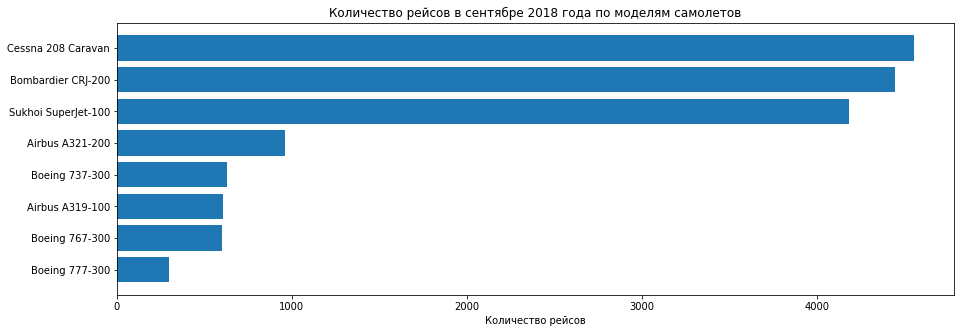

In [30]:
fig, ax = plt.subplots(figsize=(15,5))
 
sorted_query = query_1.sort_values(['flights_amount'])
model = sorted_query['model']
flights_amount = sorted_query['flights_amount']
 
ax.barh(model, flights_amount, align='center')
ax.set_xlabel('Количество рейсов')
ax.set_title('Количество рейсов в сентябре 2018 года по моделям самолетов');

Из графика видно, что больше всего рейсов на самолетах модели Sukhoi SuperJet-100, Cessna 208 Caravan, Bombardier CRJ-200 - количество полетов на этих моделях превышает 4000 за сентябрь 2018 года (что как минимум в 4 раза больше, чем на любой другой модели). 
Чуть меньше 1000 рейсов за этот месяц было выполнено на модели самолета Airbus A321-200. Примерно одинаковое количество (около 600 рейсов) было выполнено на моделях самолетов Airbus A319-100, Boeing 737-300, Boeing 767-300. И наименьшее количество полетов (300) приходится на модель Boeing 777-300.

#### 3.4 Теперь построим график отражающий среднее кол-во рейсов в августе 2018 года по городам.

In [25]:
average_flights

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
...,...,...
22,Ижевск,1.000000
65,Петропавловск-Камчатский,1.000000
31,Комсомольск-на-Амуре,1.000000
58,Нягань,1.000000


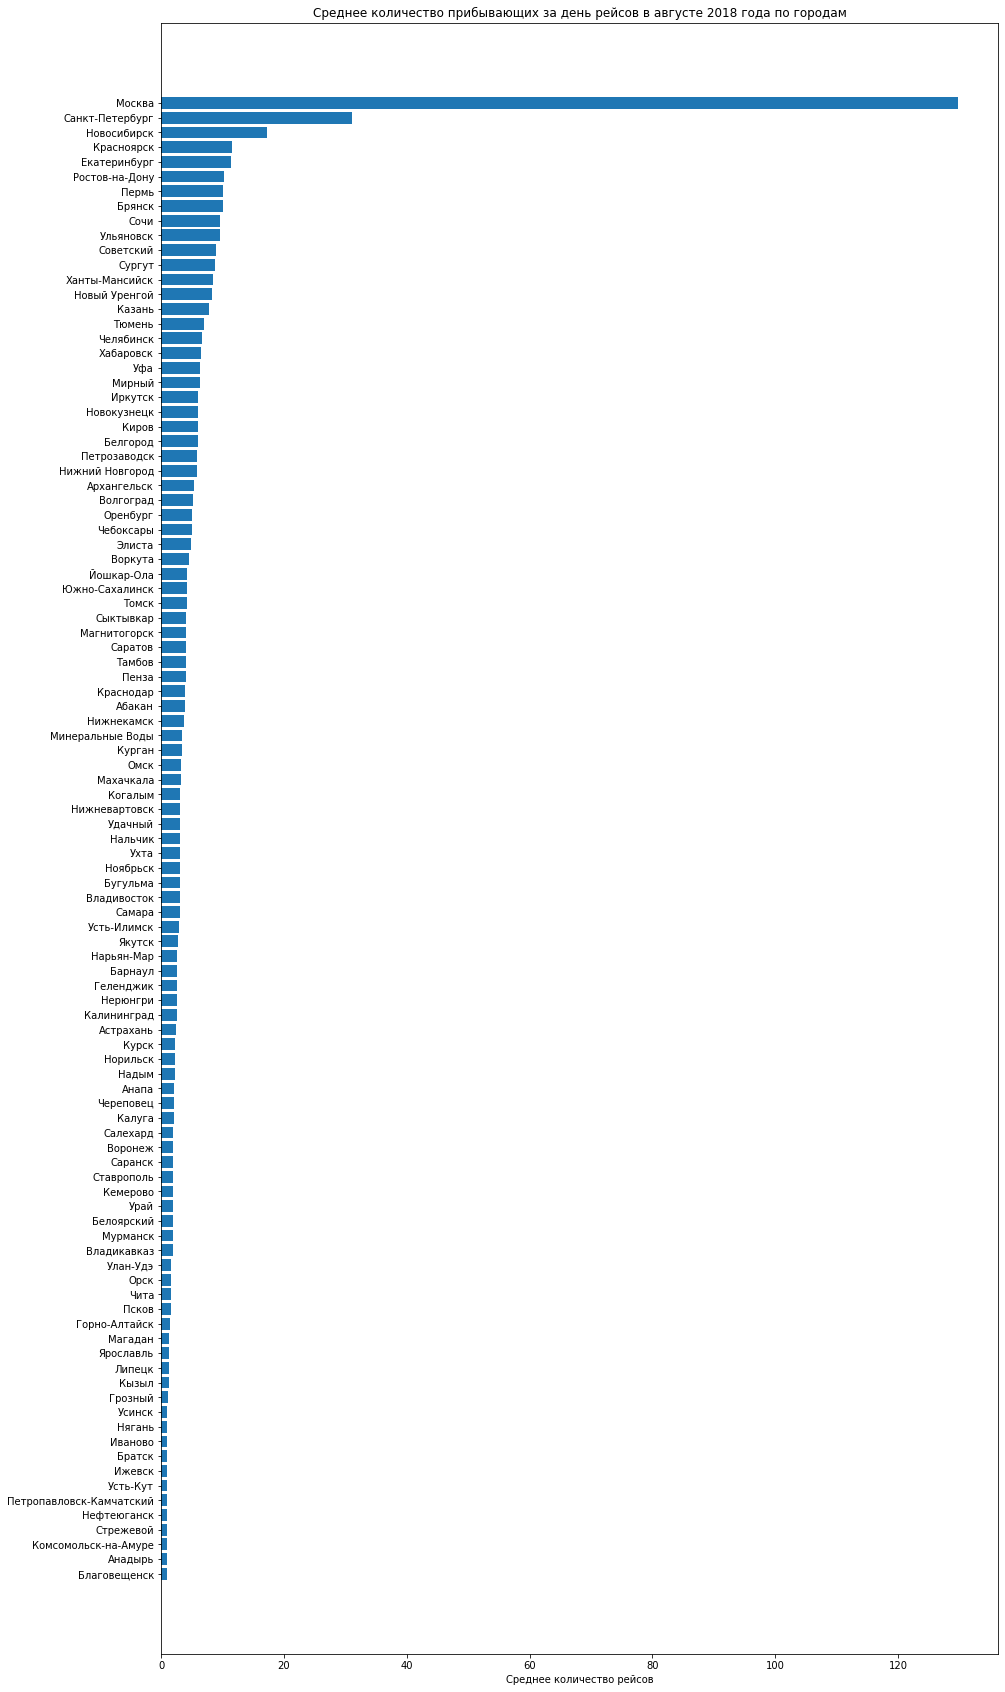

In [29]:
fig, ax = plt.subplots(figsize=(15,30))

sorted_query = query_3.sort_values(['average_flights'])
city = sorted_query['city']
average_flights = sorted_query['average_flights']
 
ax.barh(city, average_flights, align='center')
ax.set_xlabel('Среднее количество рейсов')
ax.set_title('Среднее количество прибывающих за день рейсов в августе 2018 года по городам')
plt.show()

Из данного графика видно как сильно выделяется Москва среди всех остальных городов по среднему кол-ву прибывающих в августе 2018 года рейсов - около 130 прибывающих рейсов за август 2018, в то время как в большинстве городов среднее кол-во прибывающих рейсов меньше 5. Также выделяется Санкт-Петербург, хотя там количество рейсов раз в 6 меньше, чем в Москве, около 10 рейсов и больше за август здесь только у таких городов как Екатеринбург, Красноярск, Новосибирск, Брянск, Пермь, Ростон-на-Дону, Сочи, Сургут, Ульяновск, Ханты-Мантыйск. Но также видно, что во многих городах России среднее количество прибывающих рейсов за август 2018 года равно одному.

#### 3.5 И наконец, построим среднее кол-во рейсов в августе 2018 года по городам отдельно в топ-10 городов по количеству рейсов. 

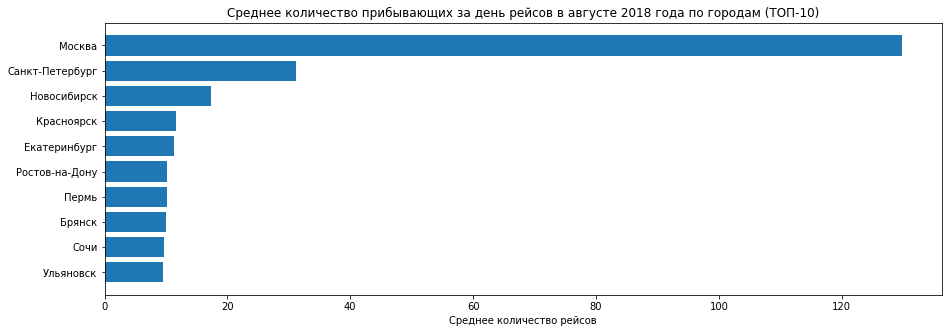

In [31]:
fig, ax = plt.subplots(figsize=(15,5))

sorted_query = top_10_cities.sort_values(['average_flights'])
top_cities = sorted_query['city']
average_flights_top = sorted_query['average_flights']
 
ax.barh(top_cities, average_flights_top, align='center')
ax.set_xlabel('Среднее количество рейсов')
ax.set_title('Среднее количество прибывающих за день рейсов в августе 2018 года по городам (ТОП-10)')
plt.show()

Из этого графика также видно разительное отличие Москвы от остальных городов, это можно объяснить тем, что в столицу прилетает много рейсов из других стран, и из многих других городов, в Перербурге кол-во зарубежных прилетающих самолетов значительно меньше. А в остальных городах скорее всего большая часть прибывающих рейсов - внутренние, и по шкале видно, что они остальные города из ТОП-10 довольно одинаковые по количеству прибывающих рейсов - их немного больше 10 в среднем по августу 2018.

#### Вывод

- Больше всего перелетов в сентябре 2018 было совершено на самолетах модели Sukhoi SuperJet-100, Cessna 208 Caravan, Bombardier CRJ-200.
- Кол-во прибывающих рейсов в разных городах можно разделить на группы: столица, северная столица, крупные города и маленькие города, количество прибывающих рейсов в них довольно сильно различается (больше 100 - около 30 - около 10 - около 1 соответственно).
- Есть разительное отличие Москвы в среднем количестве полетов в августе 2018 от остальных городов, это можно объяснить тем, что в столицу прилетает много рейсов из других стран, и из многих других городов.